## Tarea 2
Evelyn Venegas Agustín //
422068635 //
Introducción a la ciencia de datos

Primero, abrimos el archivo y separamos el primer dígito de cada archivo del resto de valores. Luego imprimimos la etiqueta y el conjunto de la imagen 130

In [29]:
import numpy as np
import csv

conjunto=[] #contendrá los 784 valores restantes de cada imagen
etiquetas=[] #contendrá el primer dígito de cada imagen

with open("/content/mnist_version_corta.csv") as f:
  for cols in csv.reader(f):
    etiquetas.append(int(cols.pop(0)))
    conjunto.append(list(map(int,cols)))

index=129
print(etiquetas[index])
print(conjunto[index][:4]) #imprime los primeros cuatro valores del conjunto de 784
#valores de la imagen numero 130 (indice 129 pues empezamos en el 0)

5
[0, 0, 0, 0]


Luego definimos una función que creará diccionarios según el valor en el array "conjunto", es decir asignará un caracter a cada pixel según el valor numérico de este

In [30]:
def get_char(pixel):
  ranges = {
    (0, 64): " ", #diccionarios!
    (64, 128): ".",
    (128, 192): "*",
    (192, 256): "#"
  }
  for (a, b), ch in ranges.items():
    if a <= pixel < b:
      return ch

print(get_char(100)) #ejemplos de uso de la función get_char
print(get_char(128))
print(get_char(200))

.
*
#


Ahora, imprimiremos un mapeo de la imagen 130 que ejemplificamos antes

In [31]:
img=np.zeros((28,28),dtype=object)

for i in range(28):
  for j in range(28):
    img[i][j]=get_char(conjunto[index][i*28+j])

#imprimimos como string para obtener un mejor output
for row in img:
  print("".join(row))

                            
                            
                            
                            
                            
              .#      **    
             .##..*#####    
            #########*.     
           #####***.        
          ##*               
         *##                
         ##                 
        .##                 
         ###*               
         .#####.            
            *###*           
              *###*         
                ###         
                .##         
                ###         
              .###          
        .    *###.          
       .# .*###*            
       .######.             
        *##*.               
                            
                            
                            


Definimos una función que calcule la distancia euclidiana entre vectores (de 748 entradas)

In [32]:
def dist_euclidiana(vector1,vector2):
  distancia=0
  for i in range(len(vector1)):
  #en principio deberíamos verificar si tienen la misma longitud, pero
  #no va a haber discrepancia en este caso
    distancia+=pow((vector1[i]-vector2[i]),2)
  return np.sqrt(distancia)

#y probamos con los vectores solicitados

print("La distancia entre los vectores 26 y 30 es: ",dist_euclidiana(conjunto[25],conjunto[29]))
print("La distancia entre los vectores 26 y 32 es: ",dist_euclidiana(conjunto[25],conjunto[31]))
print("La distancia entre los vectores 26 y 35 es: ",dist_euclidiana(conjunto[25],conjunto[34]))

print("La distancia entre los vectores 30 y 32 es: ",dist_euclidiana(conjunto[29],conjunto[31]))
print("La distancia entre los vectores 30 y 35 es: ",dist_euclidiana(conjunto[29],conjunto[34]))

print("La distancia entre los vectores 32 y 35 es: ",dist_euclidiana(conjunto[31],conjunto[34]))

La distancia entre los vectores 26 y 30 es:  3539.223219860539
La distancia entre los vectores 26 y 32 es:  3556.4199695761467
La distancia entre los vectores 26 y 35 es:  3223.2069434027967
La distancia entre los vectores 30 y 32 es:  1171.8293391104355
La distancia entre los vectores 30 y 35 es:  2531.0033583541526
La distancia entre los vectores 32 y 35 es:  2515.5599774205343


Mi hipótesis es que los números con menor distancia euclidiana serán aquellos "más parecidos" escritos a mano, por lo que se referirán al mismo dígito. Así que con ello, creo que el 30 y 32 son un 1. Además, me apoyo en la idea de que la distancia con un mismo dígito, como el 26, tiene una distancia similar con ambos.

Además, el 30 y 35, así como el 32 y 35 tienen una distancia relativamente baja, por lo que podrían parecerse. Y el número que más se parece al 1 es el 7, por lo que intuyo que el 35 es un 7.

Por descarte, el 26 debe ser el cero. Lo comprobaré en las siguientes celdas.



In [33]:
etiquetas[25]

0

In [34]:
etiquetas[29]

1

In [35]:
etiquetas[31]

1

In [36]:
etiquetas[34]

7

Ahora, definiremos una función que contará los 1 y 0 de cada "renglón":

In [53]:
Z=np.zeros(784) #z es negro
O=np.zeros(784) #o es blanco

for i in range(len(etiquetas)):
  if etiquetas[i]==0:
      for k in range(len(conjunto[i])):
        if conjunto[i][k]>=128:
          Z[k]+=1
  elif etiquetas[i]==1:
      for k in range(len(conjunto[i])):
        if conjunto[i][k]>=128:
          O[k]+=1

Ahora graficamos en un mapa de calor para obtener la silueta del número que queremos. Tomemos la imagen numero 130 nuevamente

<Figure size 640x480 with 0 Axes>

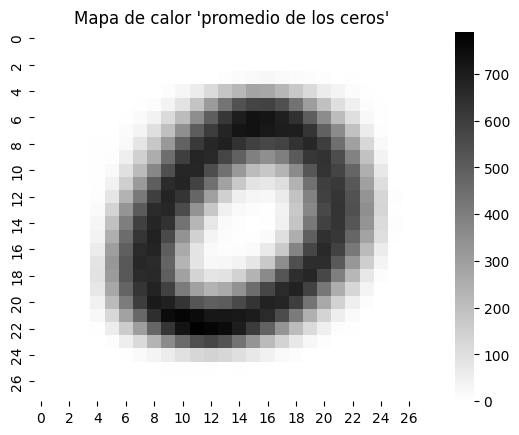

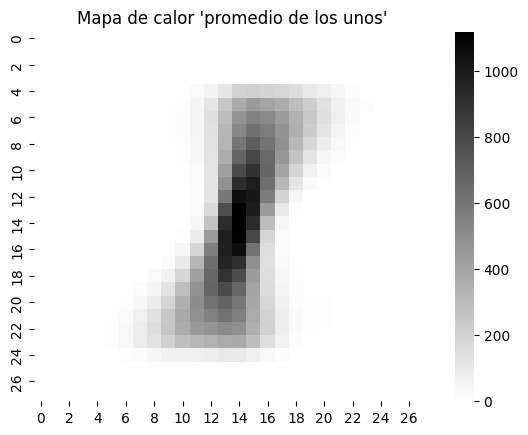

<Figure size 640x480 with 0 Axes>

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title("Mapa de calor 'promedio de los ceros'")
sns.heatmap(np.reshape(Z, (28, 28)), cmap='binary')
plt.figure()

plt.title("Mapa de calor 'promedio de los unos'")
sns.heatmap(np.reshape(O, (28, 28)), cmap='binary')
plt.figure()

In [60]:
#Ahora calculamos el valor absoluto que nos pide

x=np.array([]) #guardará todas las diferencias en valor absoluto

for i in range(len(Z)):
  x=np.append(x,abs(Z[i]-O[i]))

print(x.max(),x.argmax()) #máximo y su índice

1113.0 406


vemos que se encuentra muy cerca del medio del array(392), lo que corresponde a la coordenada (14,15) en el heatmap

esto sucede porque cuando dibujamos un cero, rodeamos el centro del mismo, mientras que cuando dibujamos un uno, lo atravesamos por lo que el centro es la principal diferencia entre un cero y un uno dibujado a mano